<a href="https://colab.research.google.com/github/szeshiang/Advanced-Computer-Vision/blob/main/062924_Image_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Blur the Image/ Low Pass Filter to smooth the images

Using 2D convolution

**Average Filter**

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

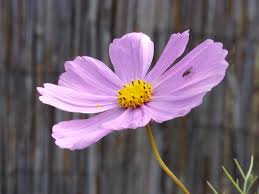

In [7]:
# load the image
img1= cv2.imread('flower.jfif')
cv2_imshow(img1)

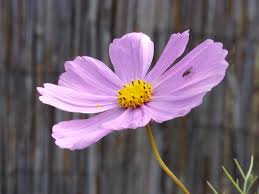

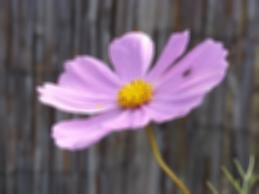

In [8]:
# using kernel method to create the blur
# kernel matrix 5"5, all elements are one; kernel is just a matrix of 3"3, 5"5 or 7"7 up to definition
kernel= np.ones((5,5),np.float32)/25; # divide by 25 is to normalise the 5"5 kernel matix bcos we want to do averaging (= blur img)
blur_image= cv2.filter2D(img1,-1,kernel)
cv2_imshow(img1)
cv2_imshow(blur_image)

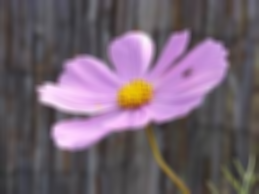

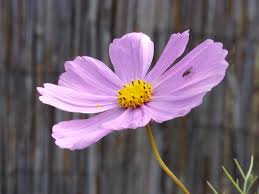

In [9]:
# using OpenCV tool "blur"
blur_img1= cv2.blur(img1,(7,7))
cv2_imshow(blur_img1)
cv2_imshow(img1)

**Gaussian Filter**

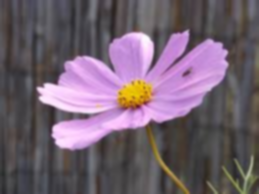

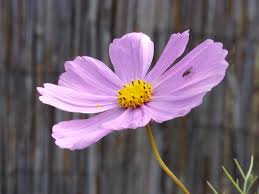

In [10]:
# apply Gaussian Filter
gaussian_filter = cv2.GaussianBlur(img1,(5,5),0) # 0 is the std deviation x dir
cv2_imshow(gaussian_filter)
cv2_imshow(img1)

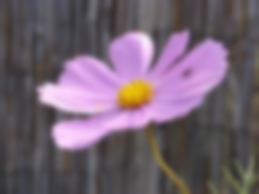

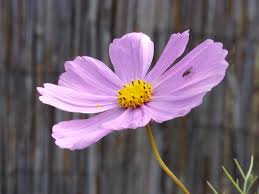

In [11]:
gaussian_filter1 = cv2.GaussianBlur(img1,(15,15),0) # 0 is the std deviation x dir
cv2_imshow(gaussian_filter1)
cv2_imshow(img1)

**Median Blur**
- takes the median of all pixels under the kernal area, replacing the central area with median value
- Median is **not** average out
- Averaging filter also blurs the edges of image but **Median blur preserves the edges** and only reduces the noise

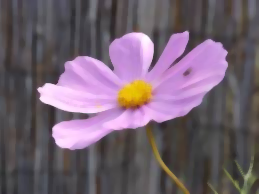

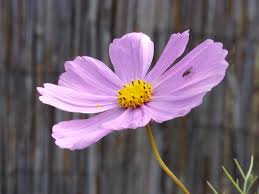

In [12]:
median_blur = cv2.medianBlur(img1,5)
cv2_imshow(median_blur)
cv2_imshow(img1)

**Bilateral Fliter**
- highly effective in noise removal, keeping the edges sharp
- depends on intensity difference between pixels

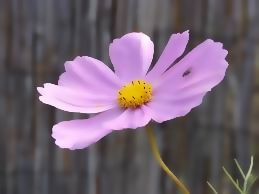

In [13]:
# apply billateral filter
bilateral_filter = cv2.bilateralFilter(img1, 9, 90, 90)
cv2_imshow(bilateral_filter)

**Edge Detection**

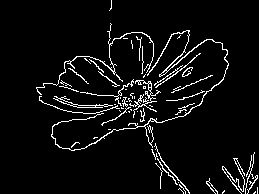

In [14]:
# canny edge detection
edges = cv2.Canny(img1,100,200) # 100 is the lower threshold; 200 is the upper threshold. It means any value below or above the threshold respectively will be compressed to 0
cv2_imshow(edges)

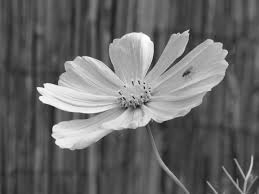

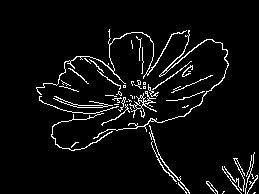

In [15]:
# Canny on grey img
# convert image into grey
grey_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
cv2_imshow(grey_img)
edges = cv2.Canny(grey_img,100,200) # 100 is the lower threshold; 200 is the upper threshold. It means any value below or above the threshold respectively will be compressed to 0
cv2_imshow(edges)

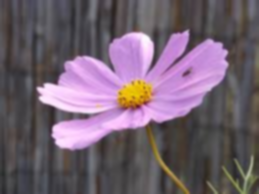

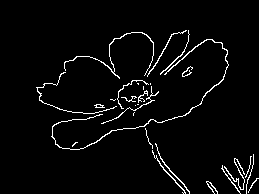

In [16]:
# Canny on blur img
edges = cv2.Canny(gaussian_filter,100,200) # 100 is the lower threshold; 200 is the upper threshold. It means any value below or above the threshold respectively will be compressed to 0
cv2_imshow(gaussian_filter)
cv2_imshow(edges)

**Drawing Contour**

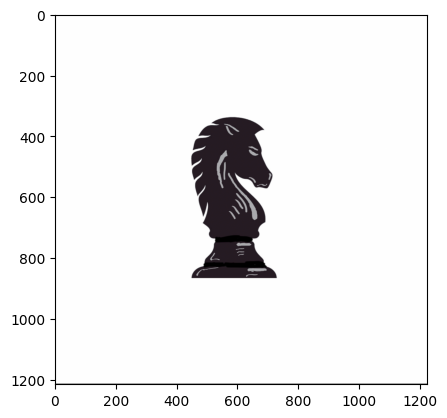

In [17]:
image=cv2.imread('horse_new.png')
plt.imshow(image)
plt.show()


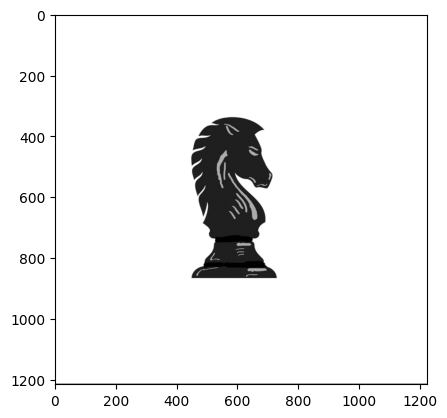

In [18]:
# convert into gray scale
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

extract binary image out of grey scale
- set a threshold of 150, below to 0, above to max 255

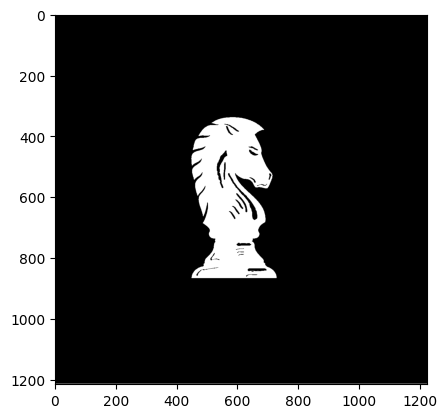

In [19]:
ret,thresh=cv2.threshold(gray,150,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh,cmap='gray')

Find the contours
1. find the contours in the image
2. pring the numbers
3. draw the contours from the image

In [20]:
contours,hierarchy=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

2


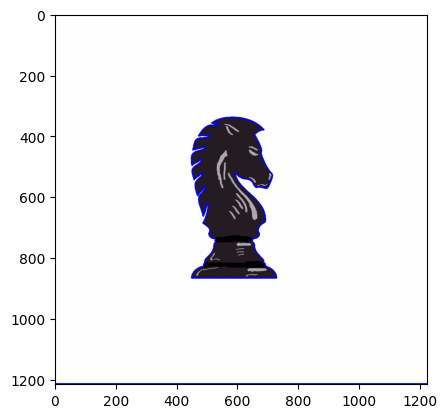

In [21]:
# draw contours
for i in range(len(contours)):
  cv2.drawContours(image,[contours[i]],0,(0,0,255),3)
plt.imshow(image)

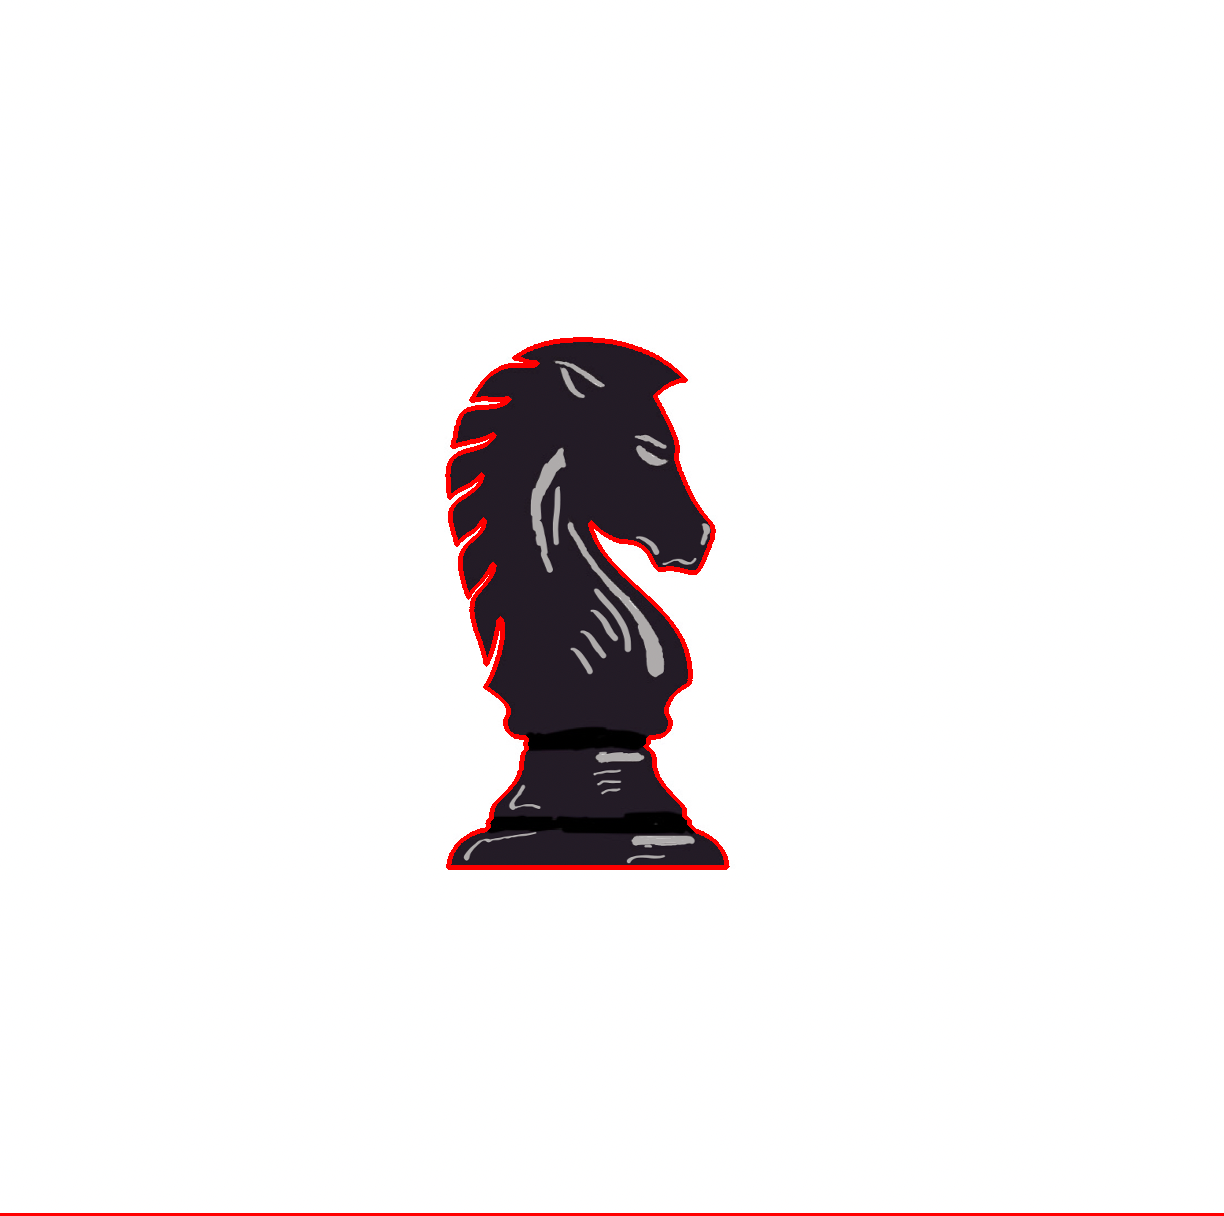

In [22]:
cv2_imshow(image)

**Lane Detection using OpenCV**

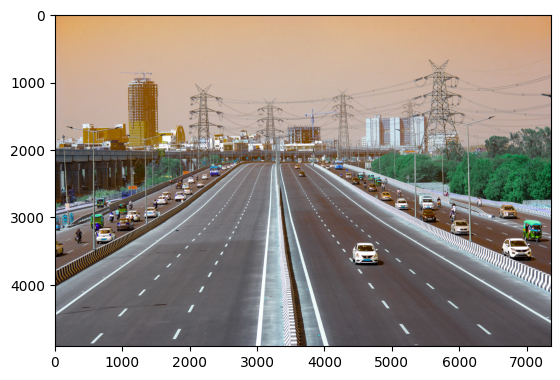

In [27]:
# read the image
highway_img=cv2.imread('Highway.jpg')
plt.imshow(highway_img)

In [28]:
# convert image into grayscale
gray=cv2.cvtColor(highway_img,cv2.COLOR_BGR2GRAY)

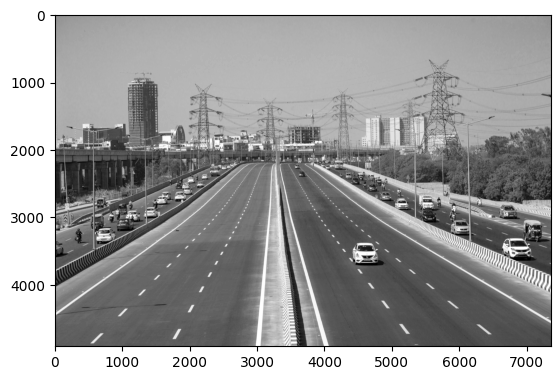

In [29]:
# apply gaussian filter
gray = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(gray,cmap='gray')

Detect lines by applying Hough Transform
- iterate over each line detected -- get the endpoints of the line, filter outlines at the top of image -- draw the filtered line on the image
- display the mod image

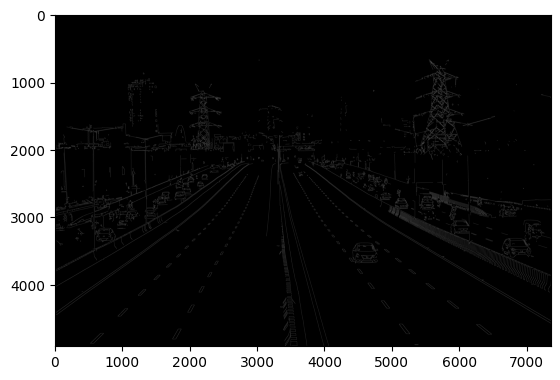

In [30]:
# apply canny edege detection
edges=cv2.Canny(gray,100,200)
plt.imshow(edges,cmap='gray')
plt.show()

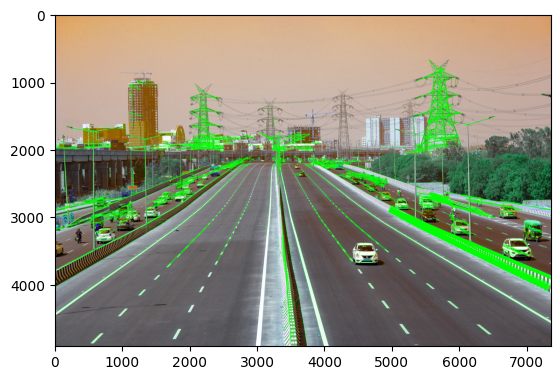

In [32]:
# apply HoughLines
lines=cv2.HoughLinesP(edges,rho=1,theta=np.pi/180,threshold=100,minLineLength=5,maxLineGap=100)

for line in lines:
  x1,y1,x2,y2=line[0]
  cv2.line(highway_img,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(highway_img)


In [ ]:
for line in lines:
  x1,y1,x2,y2=line[0]
  if (y1>4000 or y2>4000):
       cv2.line(highway_img,(x1,y1),(x2,y2),(0,255,0),3)
plt.imshow(highway_img)